<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/CLUSTERING/Clustering_medidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Validación resultado clustering

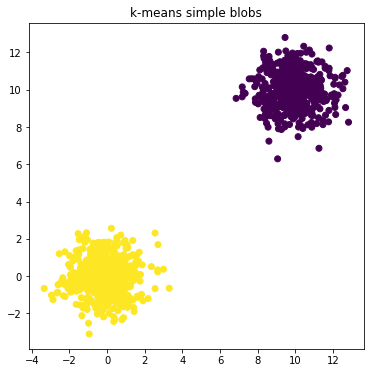

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

n_samples = 1000
centros = [(0, 0),(10,10)]
X, y = make_blobs(n_samples=n_samples, centers = centros)

y_pred = KMeans(n_clusters=2).fit_predict(X)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("k-means simple blobs")
plt.show()

Observamos la etiqueta de grupo real con la que hemos generado los puntos (ground truth): 

In [4]:
y[0:10]


array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0])

Y la etiqueta de cluster que ha asignado k-means a cada observación:

In [5]:
y_pred[0:10]

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int32)

El Adjusted Rand Index ex una medida de similaridad que permite cuantificar la correspondencia entre etiquetas reales y etiquetas del agrupamiento:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score



In [17]:
from sklearn.metrics.cluster import adjusted_rand_score
ARI1 = adjusted_rand_score([0, 0, 1, 1], [0, 0, 1, 1]) # coincidencia perfecta
ARI2 = adjusted_rand_score([0, 0, 1, 1], [1, 1, 0, 0]) # coincidencia perfecta con asignación inversa
ARI3 = adjusted_rand_score([0, 0, 1, 1], [1, 1, 1, 0]) # un error de asignación en el clustering
ARI4 = adjusted_rand_score([0, 0, 1, 1], [0, 1, 0, 1]) # desastre total

print('ARI1 = {}'.format(ARI1))
print('ARI2 = {}'.format(ARI2))
print('ARI3 = {}'.format(ARI3))
print('ARI4 = {}'.format(ARI4))

ARI1 = 1.0
ARI2 = 1.0
ARI3 = 0.0
ARI4 = -0.49999999999999994


Obtener el decrecimiento del Adjusted Rand Score a medida que las nubes de puntos generadas se acercan 